 ## Simple Example
 - Replicating Wikipedia's example: https://en.wikipedia.org/wiki/System_dynamics

## Importing SystemFlow

In [1]:
import sys
sys.path.append('..')

In [2]:
import systemflow as sf

## Building The Model

In [3]:
potential_adopters = sf.Stock("Potential Adopters", initial_value=100, lower_limit=0)
adopters = sf.Stock("Adopters", initial_value=0, lower_limit=0)

In [4]:
p = 0.03
q = 0.4

In [5]:
probability_contract_not_yet_adopted = potential_adopters / (potential_adopters + adopters)
imitators = q * adopters * probability_contract_not_yet_adopted
innovators = p * potential_adopters

In [6]:
adopting = potential_adopters >> adopters
adopting.valve = innovators + imitators

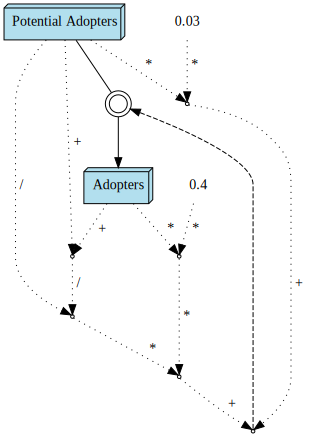

In [7]:
adopting.graphviz

In [8]:
system = sf.System(adopting, stop=20)
system.simulate()

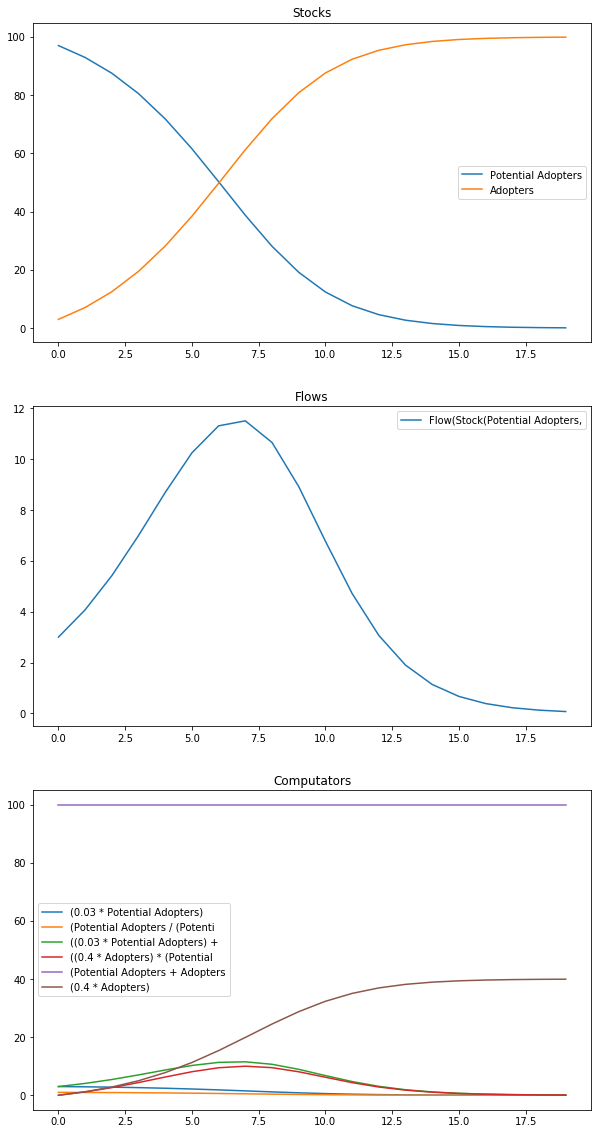

In [9]:
system.plot()